## Data Loading and Initial Exploration

In [1]:
# Import the pandas library
import pandas as pd

# Load the Excel file into a pandas DataFrame
# Replace 'Online Retail.xlsx' with the correct path if the file is not in the same directory as your notebook
file_path = 'Online Retail.xlsx'
df = pd.read_excel(file_path)

# Display the first 5 rows of the DataFrame to get a quick look at the data
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the DataFrame
print("\nDataset information:")
df.info()

# Display the dimensions of the DataFrame (rows, columns)
print("\nShape of the dataset (rows, columns):")
print(df.shape)

First 5 rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null C

## Deeper Initial Data Exploration

### Step 2: Check for Missing Values

In [2]:
# Check for the number of missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### Step 3: Handle Missing Description Values

In [3]:
# Print the shape of the DataFrame before removing missing Description rows
print("Shape before removing rows with missing Description:", df.shape)

# Remove rows where 'Description' is NaN (Not a Number)
df.dropna(subset=['Description'], inplace=True)

# Print the shape of the DataFrame after removal to see how many rows were dropped
print("Shape after removing rows with missing Description:", df.shape)

# Verify that missing values in 'Description' are handled
print("\nMissing values in 'Description' after handling:")
print(df['Description'].isnull().sum())

Shape before removing rows with missing Description: (541909, 8)
Shape after removing rows with missing Description: (540455, 8)

Missing values in 'Description' after handling:
0


### Step 4: Decide on a Strategy for Missing CustomerID (and then Convert InvoiceDate)

In [4]:
# Convert 'InvoiceDate' to datetime objects
# Pandas might have already inferred this type during read_excel, but it's good practice to ensure it.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Verify the data type of 'InvoiceDate'
print("\nData type of 'InvoiceDate' after conversion:")
print(df['InvoiceDate'].dtype)

# Display the first 5 rows again to see the 'InvoiceDate' format
print("\nFirst 5 rows with formatted InvoiceDate:")
print(df.head())


Data type of 'InvoiceDate' after conversion:
datetime64[ns]

First 5 rows with formatted InvoiceDate:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


### Step 5: Investigate Quantity and UnitPrice Columns

In [5]:
# Display descriptive statistics for Quantity and UnitPrice
print("Descriptive statistics for Quantity and UnitPrice:")
print(df[['Quantity', 'UnitPrice']].describe())

# Check for negative quantities
negative_quantity_count = (df['Quantity'] <= 0).sum()
print(f"\nNumber of rows with non-positive Quantity (<= 0): {negative_quantity_count}")

# Check for zero or negative UnitPrice
non_positive_unitprice_count = (df['UnitPrice'] <= 0).sum()
print(f"Number of rows with non-positive UnitPrice (<= 0): {non_positive_unitprice_count}")

# Show some examples of rows with non-positive Quantity if they exist
if negative_quantity_count > 0:
    print("\nExamples of rows with non-positive Quantity:")
    print(df[df['Quantity'] <= 0].head())

# Show some examples of rows with non-positive UnitPrice if they exist
if non_positive_unitprice_count > 0:
    print("\nExamples of rows with non-positive UnitPrice:")
    print(df[df['UnitPrice'] <= 0].head())

Descriptive statistics for Quantity and UnitPrice:
            Quantity      UnitPrice
count  540455.000000  540455.000000
mean        9.603129       4.623519
std       218.007598      96.889628
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

Number of rows with non-positive Quantity (<= 0): 9762
Number of rows with non-positive UnitPrice (<= 0): 1063

Examples of rows with non-positive Quantity:
    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  Cust

### Step 6: Handle Non-Positive Quantity Values

In [6]:
# Print the shape before filtering Quantity
print(f"Shape before filtering non-positive Quantity: {df.shape}")

# Keep only rows with Quantity > 0
df = df[df['Quantity'] > 0]

# Print the shape after filtering
print(f"Shape after filtering non-positive Quantity: {df.shape}")

# Verify that minimum Quantity is now positive
print("\nDescriptive statistics for Quantity after filtering:")
print(df['Quantity'].describe())

Shape before filtering non-positive Quantity: (540455, 8)
Shape after filtering non-positive Quantity: (530693, 8)

Descriptive statistics for Quantity after filtering:
count    530693.000000
mean         10.605819
std         156.637853
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64


### Step 7: Handle Non-Positive UnitPrice Values

In [7]:
# Print the shape before filtering UnitPrice
print(f"Shape before filtering non-positive UnitPrice: {df.shape}")

# Keep only rows with UnitPrice > 0
df = df[df['UnitPrice'] > 0]

# Print the shape after filtering
print(f"Shape after filtering non-positive UnitPrice: {df.shape}")

# Verify that minimum UnitPrice is now positive
print("\nDescriptive statistics for UnitPrice after filtering:")
print(df['UnitPrice'].describe())

Shape before filtering non-positive UnitPrice: (530693, 8)
Shape after filtering non-positive UnitPrice: (530104, 8)

Descriptive statistics for UnitPrice after filtering:
count    530104.000000
mean          3.907625
std          35.915681
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64


### Step 8: Feature Engineering - Create TotalPrice Column

In [8]:
# Create the TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Display the first 5 rows to see the new TotalPrice column
print("First 5 rows with the new 'TotalPrice' column:")
print(df.head())

# Optionally, you can also check descriptive statistics for TotalPrice
print("\nDescriptive statistics for 'TotalPrice':")
print(df['TotalPrice'].describe())

First 5 rows with the new 'TotalPrice' column:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  

Descriptive statistics for 'TotalPrice':
count    530104.000000
mean 

### Step 9: Feature Engineering - Extract Date/Time Components

In [9]:
# Extract Year
df['Year'] = df['InvoiceDate'].dt.year

# Extract Month (as month number e.g., 1 for January, 12 for December)
df['Month'] = df['InvoiceDate'].dt.month

# Extract Month Name (e.g., 'January', 'February') - often useful for plotting
df['MonthName'] = df['InvoiceDate'].dt.month_name()

# Extract Day of the Week (0 for Monday, 6 for Sunday)
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Extract Day Name (e.g., 'Monday', 'Tuesday')
df['DayName'] = df['InvoiceDate'].dt.day_name()

# Extract Hour
df['Hour'] = df['InvoiceDate'].dt.hour

# Display the first 5 rows to see the new date/time component columns
print("First 5 rows with new date/time component columns:")
print(df.head())

# Also check the data types to ensure they are what we expect
print("\nData types of new columns:")
print(df[['Year', 'Month', 'MonthName', 'DayOfWeek', 'DayName', 'Hour']].dtypes)

First 5 rows with new date/time component columns:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   Year  Month MonthName  DayOfWeek    DayName  Hour  
0  2

### Step 10: Analyze and Visualize Monthly Sales Trends

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set a style for seaborn plots for better aesthetics
sns.set_style("darkgrid") # You can try other styles like "whitegrid", "ticks", etc.

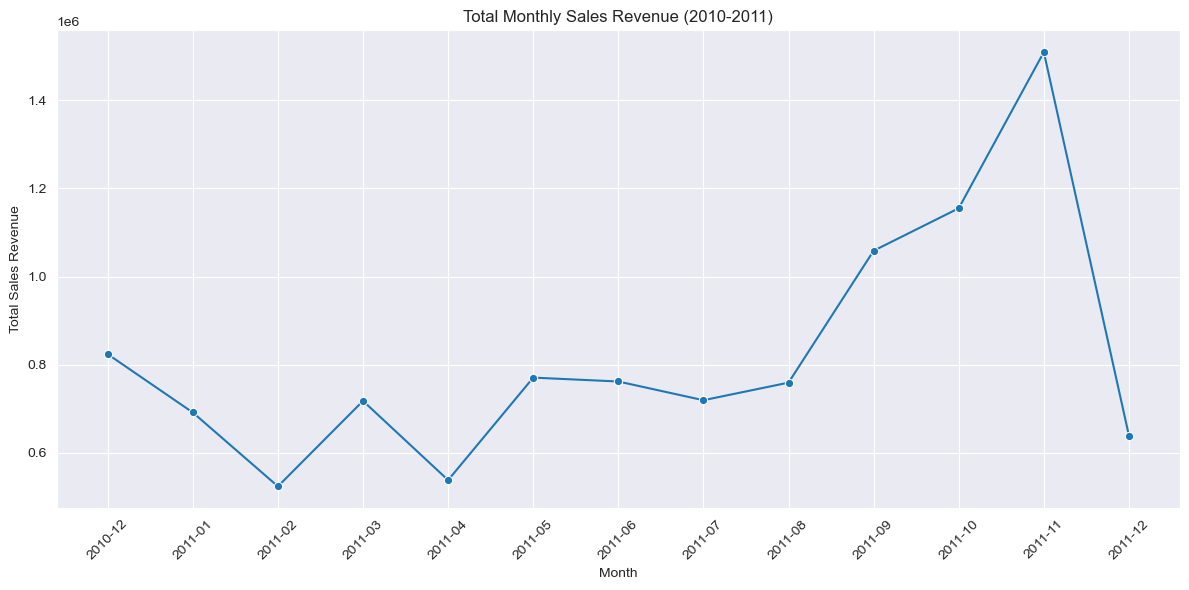

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set a style for seaborn plots for better aesthetics
sns.set_style("darkgrid")

# Create a 'YearMonth' column for easier grouping and ordering on plots
# Example: 2010-12, 2011-01
# This should already be in your df from the previous step
if 'YearMonth' not in df.columns: # Add this check just in case
    df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by 'YearMonth' and sum 'TotalPrice' to get monthly sales
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()

# --- THIS IS THE KEY CHANGE ---
# Convert 'YearMonth' to string type for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)
# --- END OF KEY CHANGE ---

plt.figure(figsize=(12, 6)) # Set the figure size for better readability
sns.lineplot(x='YearMonth', y='TotalPrice', data=monthly_sales, marker='o') # Create the line plot

plt.title('Total Monthly Sales Revenue (2010-2011)') # Add a title
plt.xlabel('Month') # Add x-axis label
plt.ylabel('Total Sales Revenue') # Add y-axis label
plt.xticks(rotation=45) # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show() # Display the plot

### Step 11: Analyze and Visualize Sales by Day of the Week

C:\Users\M-kas\AppData\Local\Temp\ipykernel_20564\4012394715.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayName', y='TotalPrice', data=daily_sales, palette='viridis') # 'palette' changes the color scheme


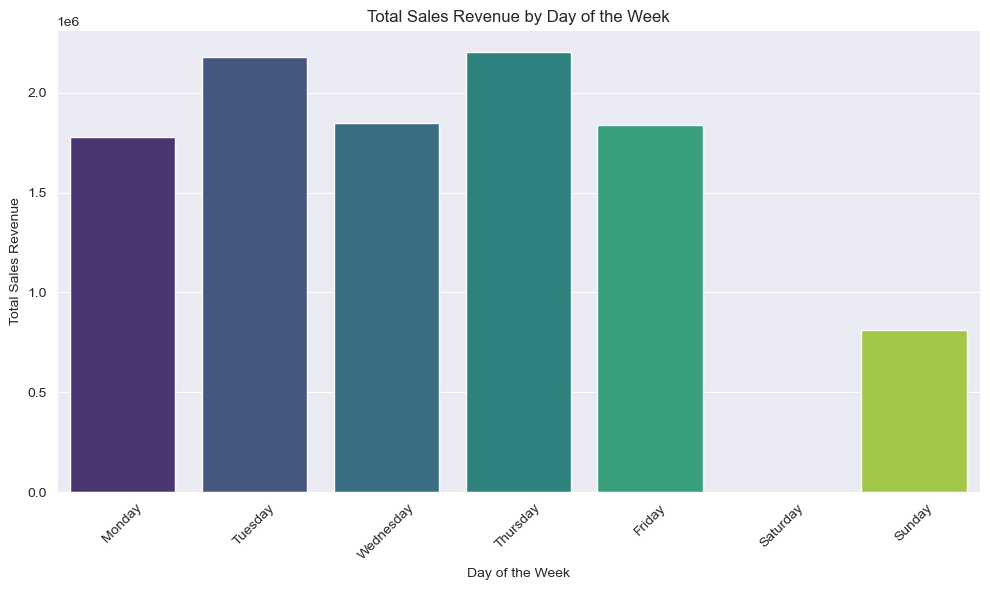

In [12]:
# Group by 'DayName' and sum 'TotalPrice'
daily_sales = df.groupby('DayName')['TotalPrice'].sum().reset_index()

# To ensure the days are plotted in a logical order (e.g., Monday to Sunday)
# we can convert 'DayName' to a categorical type with a defined order.
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales['DayName'] = pd.Categorical(daily_sales['DayName'], categories=days_order, ordered=True)

# Sort by the defined day order
daily_sales = daily_sales.sort_values('DayName')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='DayName', y='TotalPrice', data=daily_sales, palette='viridis') # 'palette' changes the color scheme

plt.title('Total Sales Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45) # Rotate day names if needed
plt.tight_layout()
plt.show()

### Step 12: Analyze and Visualize Top-Selling Products by Revenue

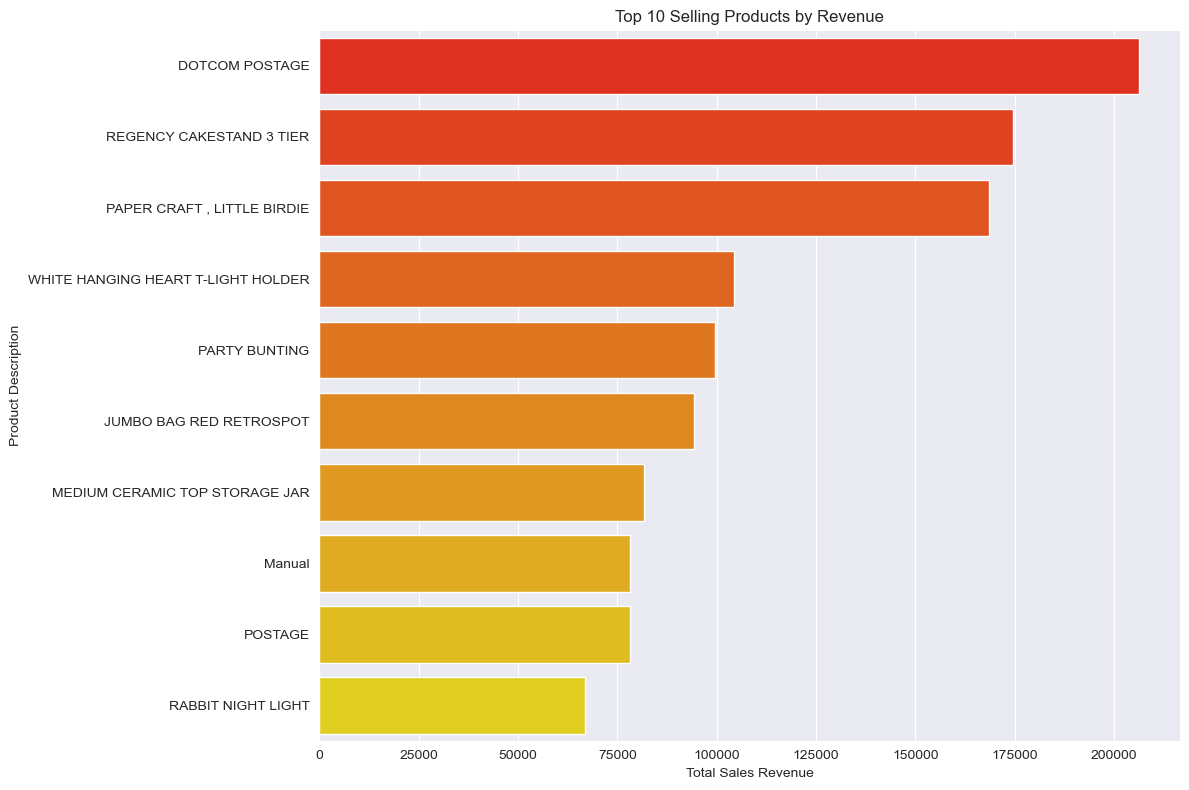


Top 10 products by sales revenue:
     StockCode                         Description  TotalPrice
4150       DOT                      DOTCOM POSTAGE   206248.77
1262     22423            REGENCY CAKESTAND 3 TIER   174484.74
2590     23843         PAPER CRAFT , LITTLE BIRDIE   168469.60
3773    85123A  WHITE HANGING HEART T-LIGHT HOLDER   104340.29
2669     47566                       PARTY BUNTING    99504.33
3761    85099B             JUMBO BAG RED RETROSPOT    94340.05
2045     23166      MEDIUM CERAMIC TOP STORAGE JAR    81700.92
4151         M                              Manual    78110.27
4153      POST                             POSTAGE    78101.88
1951     23084                  RABBIT NIGHT LIGHT    66964.99


In [13]:
# Group by 'StockCode' and 'Description' to get sales per product
# We group by both in case different StockCodes might accidentally share a Description or vice-versa,
# though typically StockCode is the unique identifier for a product.
top_products_revenue = df.groupby(['StockCode', 'Description'])['TotalPrice'].sum().reset_index()

# Sort the products by total revenue in descending order
top_products_revenue = top_products_revenue.sort_values(by='TotalPrice', ascending=False)

# Select the top N products (e.g., top 10)
N = 10
top_n_products = top_products_revenue.head(N)

# Create the bar plot for top N products by revenue
plt.figure(figsize=(12, 8)) # Adjust figure size as needed
sns.barplot(x='TotalPrice', y='Description', data=top_n_products, 
            palette='autumn', hue='Description', dodge=False, legend=False) # Using the updated way to handle palette

plt.title(f'Top {N} Selling Products by Revenue')
plt.xlabel('Total Sales Revenue')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

# You can also print the top N products table
print(f"\nTop {N} products by sales revenue:")
print(top_n_products)

### Step 13: Analyze and Visualize Top-Selling Products by Quantity Sold

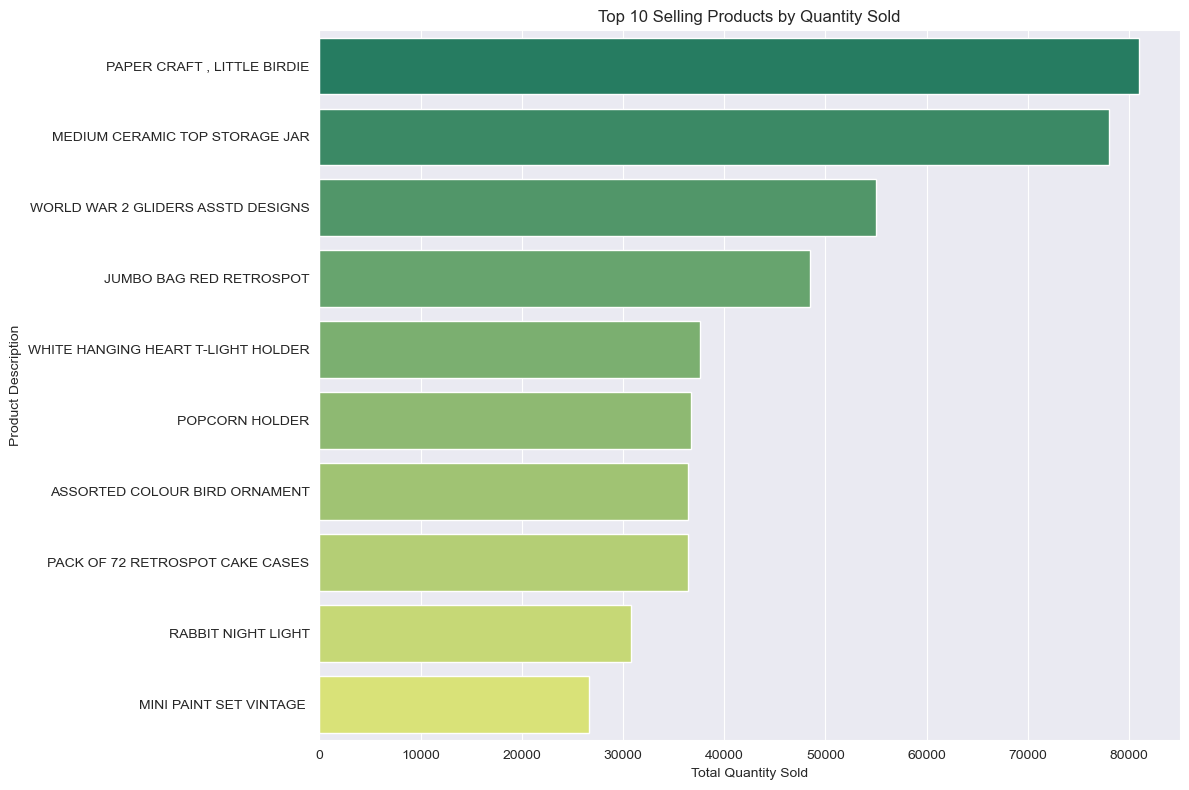


Top 10 products by quantity sold:
     StockCode                         Description  Quantity
2590     23843         PAPER CRAFT , LITTLE BIRDIE     80995
2045     23166      MEDIUM CERAMIC TOP STORAGE JAR     78033
2769     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
3761    85099B             JUMBO BAG RED RETROSPOT     48474
3773    85123A  WHITE HANGING HEART T-LIGHT HOLDER     37599
1051     22197                      POPCORN HOLDER     36761
2875     84879       ASSORTED COLOUR BIRD ORNAMENT     36461
370      21212     PACK OF 72 RETROSPOT CAKE CASES     36419
1951     23084                  RABBIT NIGHT LIGHT     30788
1327     22492             MINI PAINT SET VINTAGE      26633


In [14]:
# Group by 'StockCode' and 'Description' to get quantity sold per product
top_products_quantity = df.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

# Sort the products by total quantity sold in descending order
top_products_quantity = top_products_quantity.sort_values(by='Quantity', ascending=False)

# Select the top N products (e.g., top 10)
N = 10
top_n_products_qty = top_products_quantity.head(N)

# Create the bar plot for top N products by quantity
plt.figure(figsize=(12, 8)) # Adjust figure size as needed
sns.barplot(x='Quantity', y='Description', data=top_n_products_qty,
            palette='summer', hue='Description', dodge=False, legend=False)

plt.title(f'Top {N} Selling Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

# You can also print the top N products table
print(f"\nTop {N} products by quantity sold:")
print(top_n_products_qty)

### Step 14: Filter Out Non-Product Specific Entries

In [15]:
# List of non-product StockCodes to filter out
non_product_codes = ['DOT', 'M', 'POST']

# Print the shape of the DataFrame before filtering
print(f"Shape before filtering non-product codes: {df.shape}")

# Filter out the rows with these StockCodes
# The ~ inverts the boolean mask, so we keep rows where StockCode is NOT in non_product_codes
df_products_only = df[~df['StockCode'].isin(non_product_codes)]

# Print the shape of the DataFrame after filtering
print(f"Shape after filtering non-product codes: {df_products_only.shape}")

# You can verify by checking if these codes still exist (they shouldn't in df_products_only)
print(f"\nAre 'DOT', 'M', 'POST' still in StockCode after filtering? ")
print(f"DOT: {df_products_only[df_products_only['StockCode'] == 'DOT'].shape[0] == 0}")
print(f"M:   {df_products_only[df_products_only['StockCode'] == 'M'].shape[0] == 0}")
print(f"POST: {df_products_only[df_products_only['StockCode'] == 'POST'].shape[0] == 0}")

# IMPORTANT: For subsequent analyses focusing on products, use df_products_only.
# If you want to go back to the full dataset including these charges for some reason, you still have 'df'.

Shape before filtering non-product codes: (530104, 16)
Shape after filtering non-product codes: (527951, 16)

Are 'DOT', 'M', 'POST' still in StockCode after filtering? 
DOT: True
M:   True
POST: True


### Step 15: Analyze and Visualize Sales by Country

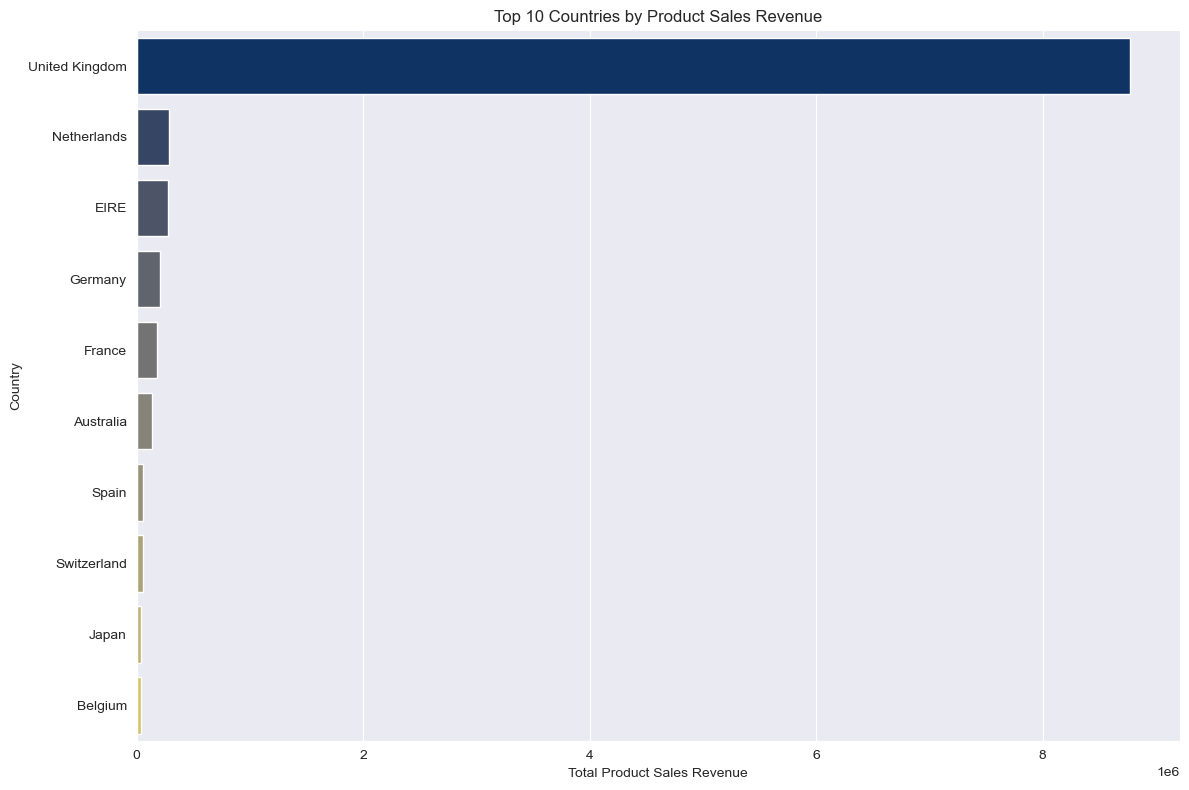


Top 10 countries by product sales revenue:
           Country   TotalPrice
36  United Kingdom  8774776.224
24     Netherlands   283889.340
10            EIRE   276404.300
14         Germany   205569.890
13          France   184768.740
0        Australia   138171.310
31           Spain    55725.110
33     Switzerland    53087.900
20           Japan    37416.370
3          Belgium    36927.340

Total revenue from United Kingdom: 8,774,776.22
Percentage of total revenue from United Kingdom: 85.16%


In [16]:
# Ensure matplotlib.pyplot and seaborn are imported
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Country' and sum 'TotalPrice' from the filtered DataFrame
sales_by_country = df_products_only.groupby('Country')['TotalPrice'].sum().reset_index()

# Sort countries by total sales revenue in descending order
sales_by_country_sorted = sales_by_country.sort_values(by='TotalPrice', ascending=False)

# Select the top N countries (e.g., top 10)
N = 10
top_n_countries = sales_by_country_sorted.head(N)

# Create the bar plot for top N countries
plt.figure(figsize=(12, 8))
sns.barplot(x='TotalPrice', y='Country', data=top_n_countries,
            palette='cividis', hue='Country', dodge=False, legend=False)

plt.title(f'Top {N} Countries by Product Sales Revenue')
plt.xlabel('Total Product Sales Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Print the top N countries table
print(f"\nTop {N} countries by product sales revenue:")
print(top_n_countries)

# Optional: Calculate the percentage contribution of the top country (usually UK)
total_revenue = df_products_only['TotalPrice'].sum()
uk_revenue = sales_by_country_sorted[sales_by_country_sorted['Country'] == 'United Kingdom']['TotalPrice'].iloc[0]
uk_percentage = (uk_revenue / total_revenue) * 100
print(f"\nTotal revenue from United Kingdom: {uk_revenue:,.2f}")
print(f"Percentage of total revenue from United Kingdom: {uk_percentage:.2f}%")

### Step 16: Analyze and Visualize Sales by Hour of the Day

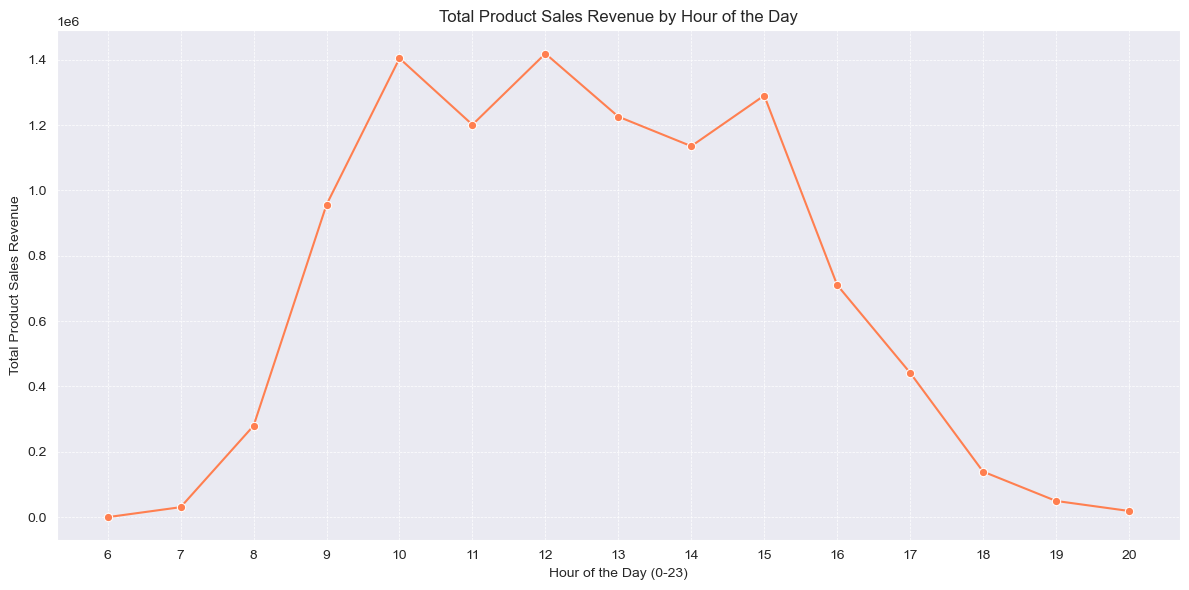


Product sales revenue by hour of the day:
    Hour   TotalPrice
0      6        4.250
1      7    30519.210
2      8   279865.520
3      9   956672.991
4     10  1404434.331
5     11  1201228.460
6     12  1418960.590
7     13  1225947.170
8     14  1135580.251
9     15  1290594.400
10    16   710568.410
11    17   441919.451
12    18   139388.560
13    19    49608.720
14    20    18931.310


In [17]:
# Ensure matplotlib.pyplot and seaborn are imported
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Hour' and sum 'TotalPrice' from the filtered DataFrame
sales_by_hour = df_products_only.groupby('Hour')['TotalPrice'].sum().reset_index()

# Create the bar plot (or line plot) for sales by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='TotalPrice', data=sales_by_hour, marker='o', color='coral') # Line plot can show trend well
# Alternatively, a bar plot:
# sns.barplot(x='Hour', y='TotalPrice', data=sales_by_hour, color='coral', hue='Hour', legend=False, dodge=False)


plt.title('Total Product Sales Revenue by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Total Product Sales Revenue')
plt.xticks(sales_by_hour['Hour']) # Ensure all hours are shown as ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5) # Add a grid for easier reading
plt.tight_layout()
plt.show()

# Print the table for sales by hour
print("\nProduct sales revenue by hour of the day:")
print(sales_by_hour)

### Step 17: Prepare Data for Customer Analysis & Identify Top Customers by Revenue

C:\Users\M-kas\AppData\Local\Temp\ipykernel_20564\1842643552.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['CustomerID'] = df_customers['CustomerID'].astype(int)


Number of unique customers with identified transactions: 4335


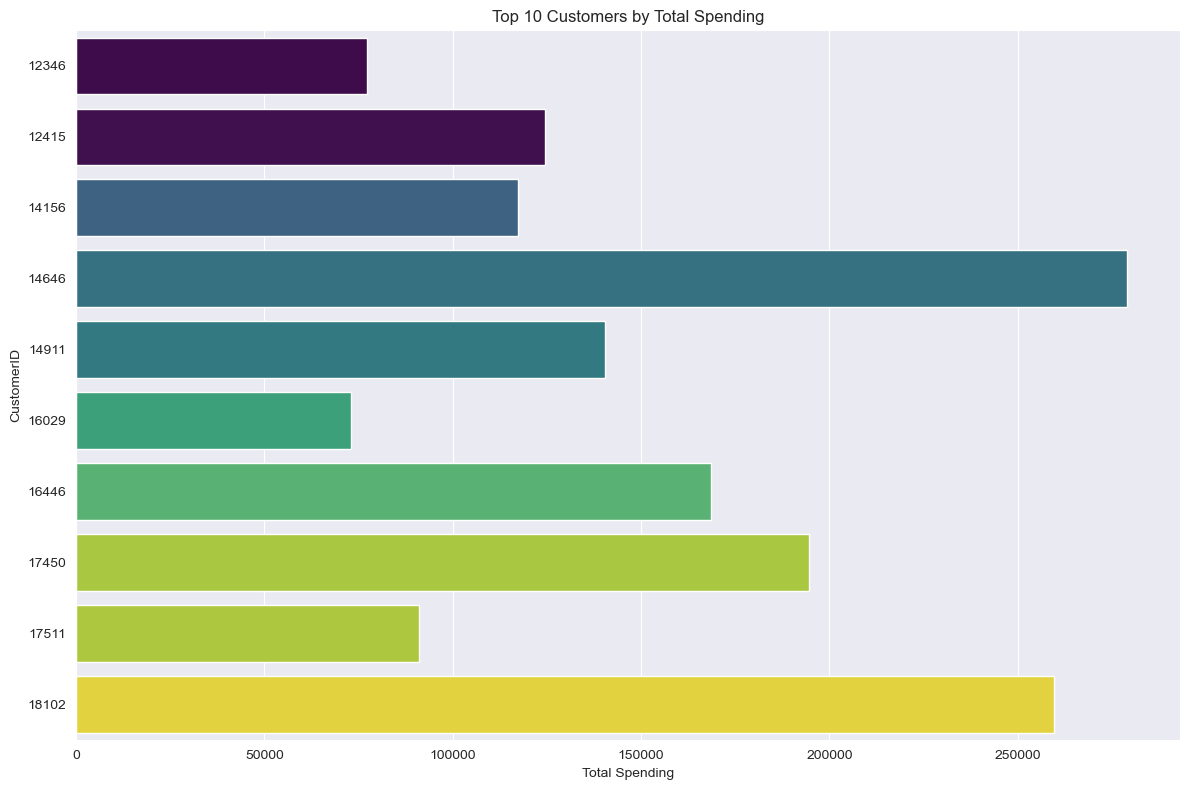


Top 10 customers by total spending:
      CustomerID  TotalPrice
1689       14646   279138.02
4198       18102   259657.30
3726       17450   194550.79
3007       16446   168472.50
1879       14911   140450.72
55         12415   124564.53
1333       14156   117379.63
3769       17511    91062.38
0          12346    77183.60
2701       16029    72882.09


In [18]:
# Ensure pandas, matplotlib.pyplot and seaborn are available
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a DataFrame with only transactions that have a CustomerID
df_customers = df_products_only.dropna(subset=['CustomerID'])

# Optional: Convert CustomerID to integer type if it's float (it often is after loading/joining)
# It's good practice for IDs, but check if any non-integer IDs would be lost.
# Given it's often loaded as float due to NaNs, and NaNs are now dropped, this should be safe.
if df_customers['CustomerID'].dtype == 'float':
    df_customers['CustomerID'] = df_customers['CustomerID'].astype(int)


# 2. Calculate the number of unique customers
unique_customer_count = df_customers['CustomerID'].nunique()
print(f"Number of unique customers with identified transactions: {unique_customer_count}")

# 3. Identify top customers by total spending (revenue)
customer_spending = df_customers.groupby('CustomerID')['TotalPrice'].sum().reset_index()

# Sort customers by total spending in descending order
top_spending_customers = customer_spending.sort_values(by='TotalPrice', ascending=False)

# Select the top N customers (e.g., top 10)
N = 10
top_n_spenders = top_spending_customers.head(N)

# 4. Visualize top N spending customers
plt.figure(figsize=(12, 8))
sns.barplot(x='TotalPrice', y='CustomerID', data=top_n_spenders,
            palette='viridis', hue='CustomerID', dodge=False, legend=False, orient='h')
# Note: CustomerID is numeric, so it might look dense on y-axis if not treated as category for plotting.
# For better y-axis labels with CustomerID, we can convert it to string for this plot:
# top_n_spenders_plot = top_n_spenders.copy()
# top_n_spenders_plot['CustomerID'] = top_n_spenders_plot['CustomerID'].astype(str)
# sns.barplot(x='TotalPrice', y='CustomerID', data=top_n_spenders_plot, ...)


plt.title(f'Top {N} Customers by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('CustomerID')
plt.tight_layout()
plt.show()

# Print the top N spending customers table
print(f"\nTop {N} customers by total spending:")
print(top_n_spenders)

### Step 18: Identify Top Customers by Number of Orders

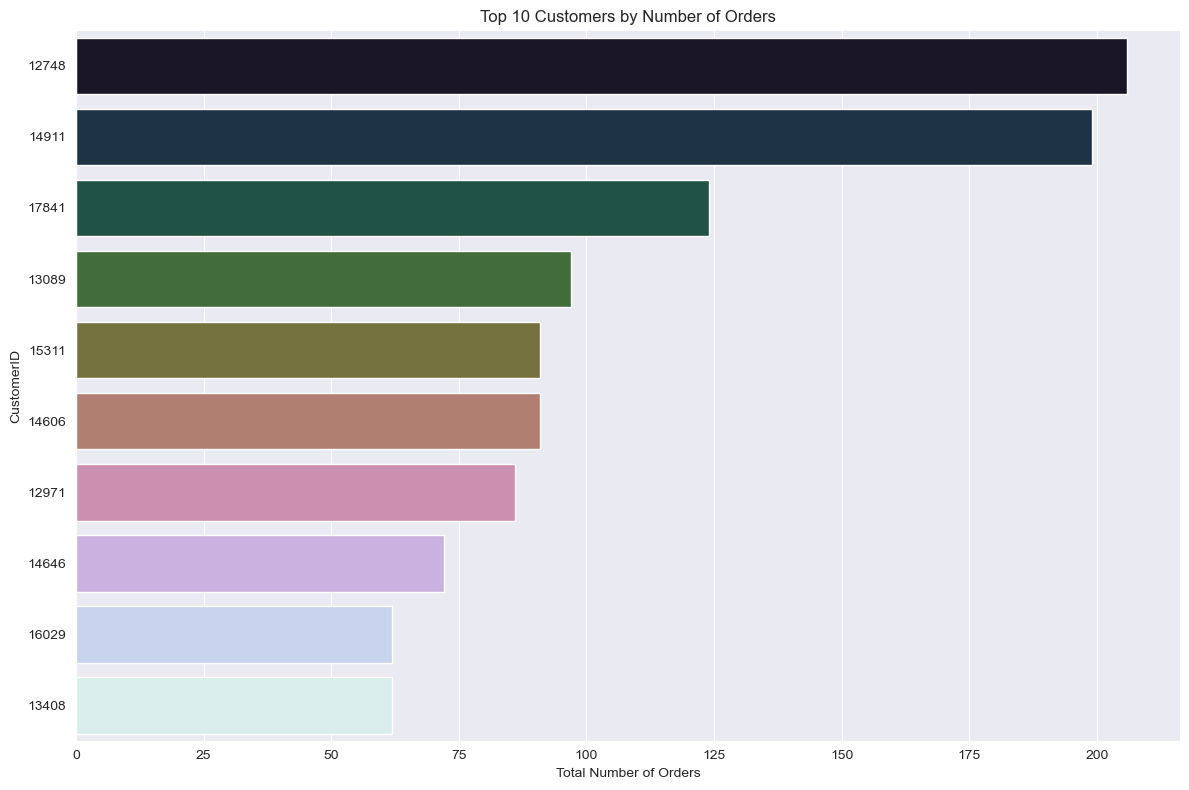


Top 10 customers by number of orders:
      CustomerID  NumberOfOrders
326        12748             206
1879       14911             199
4008       17841             124
562        13089              97
2176       15311              91
1661       14606              91
481        12971              86
1689       14646              72
2701       16029              62
795        13408              62


In [19]:
# Ensure pandas, matplotlib.pyplot and seaborn are available
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the number of unique orders (invoices) per customer
customer_orders = df_customers.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_orders.rename(columns={'InvoiceNo': 'NumberOfOrders'}, inplace=True)

# 2. Sort customers by the number of orders in descending order
top_order_customers = customer_orders.sort_values(by='NumberOfOrders', ascending=False)

# 3. Select the top N customers (e.g., top 10)
N = 10
top_n_order_customers = top_order_customers.head(N)

# 4. Visualize top N customers by number of orders
plt.figure(figsize=(12, 8))
# For better y-axis labels with CustomerID, convert it to string for this plot:
top_n_order_customers_plot = top_n_order_customers.copy()
top_n_order_customers_plot['CustomerID'] = top_n_order_customers_plot['CustomerID'].astype(str)

sns.barplot(x='NumberOfOrders', y='CustomerID', data=top_n_order_customers_plot,
            palette='cubehelix', hue='CustomerID', dodge=False, legend=False, orient='h')

plt.title(f'Top {N} Customers by Number of Orders')
plt.xlabel('Total Number of Orders')
plt.ylabel('CustomerID')
plt.tight_layout()
plt.show()

# Print the top N customers table
print(f"\nTop {N} customers by number of orders:")
print(top_n_order_customers)

### Step 19: Analyze Distribution of Number of Orders Per Customer

Descriptive statistics for Number of Orders per Customer:
count    4335.000000
mean        4.248212
std         7.646024
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       206.000000
Name: NumberOfOrders, dtype: float64


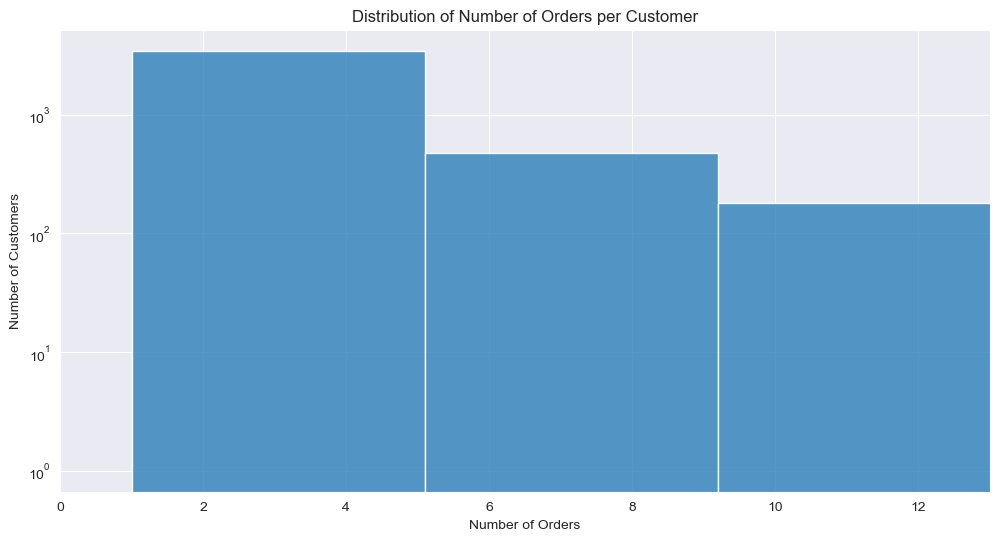


Value counts for Number of Orders (Top 15 frequencies):
NumberOfOrders
1     1505
2      830
3      504
4      394
5      237
6      173
7      138
8       98
9       69
10      55
11      54
12      43
13      29
15      26
17      19
Name: count, dtype: int64

Number of customers who made only 1 order: 1505
Percentage of identified customers who are one-time buyers: 34.72%


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# We already have 'customer_orders' DataFrame with CustomerID and NumberOfOrders

# Let's look at the descriptive statistics for NumberOfOrders
print("Descriptive statistics for Number of Orders per Customer:")
print(customer_orders['NumberOfOrders'].describe())

# Visualize the distribution of the number of orders
plt.figure(figsize=(12, 6))
sns.histplot(customer_orders['NumberOfOrders'], bins=50, kde=False) # Adjust bins as needed
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.yscale('log') # Use a log scale for y-axis if the distribution is heavily skewed (many customers with few orders)
plt.xlim(0, customer_orders['NumberOfOrders'].quantile(0.95)) # Optional: Zoom in on the majority, excluding extreme outliers for better viz
plt.show()

# For more clarity on customers with few orders (e.g., 1-10 orders)
print("\nValue counts for Number of Orders (Top 15 frequencies):")
print(customer_orders['NumberOfOrders'].value_counts().nlargest(15))

one_time_buyers = customer_orders[customer_orders['NumberOfOrders'] == 1].shape[0]
total_identified_customers = customer_orders.shape[0] # Should be same as unique_customer_count from Step 17
if total_identified_customers > 0:
    percentage_one_time_buyers = (one_time_buyers / total_identified_customers) * 100
    print(f"\nNumber of customers who made only 1 order: {one_time_buyers}")
    print(f"Percentage of identified customers who are one-time buyers: {percentage_one_time_buyers:.2f}%")

Descriptive statistics for Number of Orders per Customer:
count    4335.000000
mean        4.248212
std         7.646024
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       206.000000
Name: NumberOfOrders, dtype: float64


(0.0, 21.0)

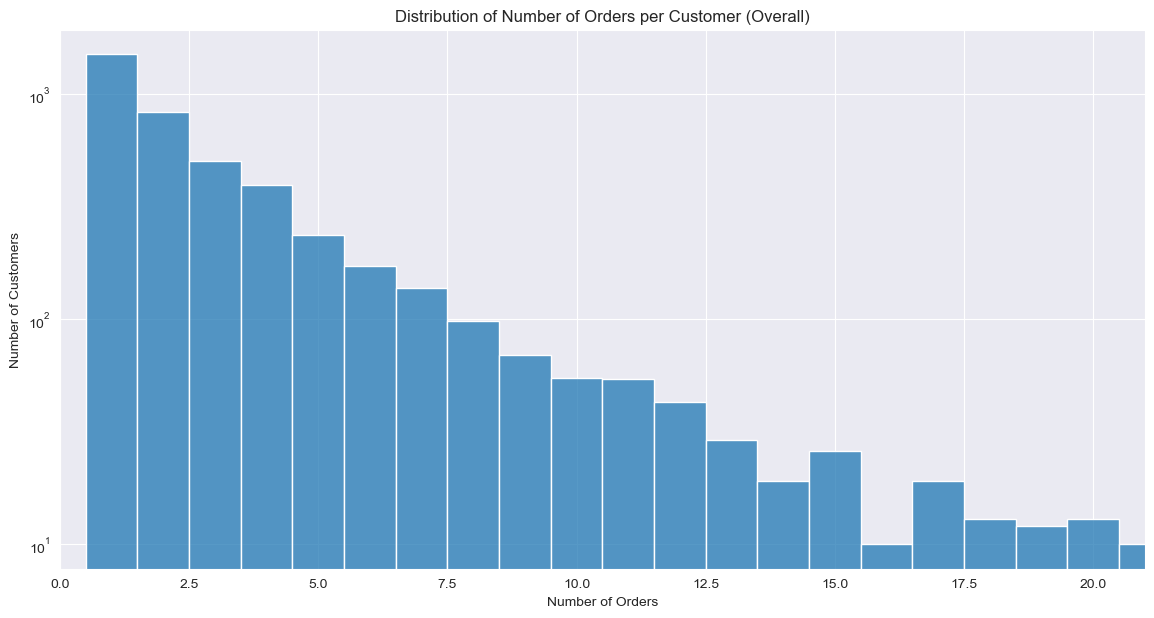

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # For potential bin calculations

# We assume 'customer_orders' DataFrame with CustomerID and NumberOfOrders
# is already created from the first part of Step 19:
# customer_orders = df_customers.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
# customer_orders.rename(columns={'InvoiceNo': 'NumberOfOrders'}, inplace=True)

# --- Descriptive Statistics (same as before) ---
print("Descriptive statistics for Number of Orders per Customer:")
print(customer_orders['NumberOfOrders'].describe())

# --- Enhanced Histogram for Overall Distribution ---
plt.figure(figsize=(14, 7)) # Increased figure size

# Determine a reasonable upper limit for x-axis for visualization
# (e.g., 98th percentile to exclude extreme outliers that stretch the plot)
xlim_upper = customer_orders['NumberOfOrders'].quantile(0.98)
if xlim_upper <= 10: # Ensure xlim_upper is at least a bit beyond the very low counts
    xlim_upper = min(20, customer_orders['NumberOfOrders'].max())


# You might need to experiment with the number of bins
# For integer data like order counts, sometimes specific bins make sense
# If xlim_upper is small, we can have a bin for each integer value
if xlim_upper <= 30: # If the 98th percentile is low, use integer bins
    bins = np.arange(1, xlim_upper + 2) - 0.5 # Bins centered around integers
else: # Otherwise, use a reasonable number of bins
    bins = 50

sns.histplot(data=customer_orders, x='NumberOfOrders', bins=bins, kde=False)
plt.title('Distribution of Number of Orders per Customer (Overall)')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.yscale('log')  # Log scale is crucial for skewed data
plt.xlim(0, xlim_upper) # Zoom in on the majority

### Step 20: Analyze Average Order Value (AOV)

Overall Average Order Value (AOV) for identified customers: 476.10

Descriptive statistics for Average Order Value (AOV) per Customer:
count     4335.000000
mean       416.999131
std       1800.693414
min          3.750000
25%        178.068333
50%        290.660000
75%        425.706667
max      84236.250000
Name: AOV_per_Customer, dtype: float64


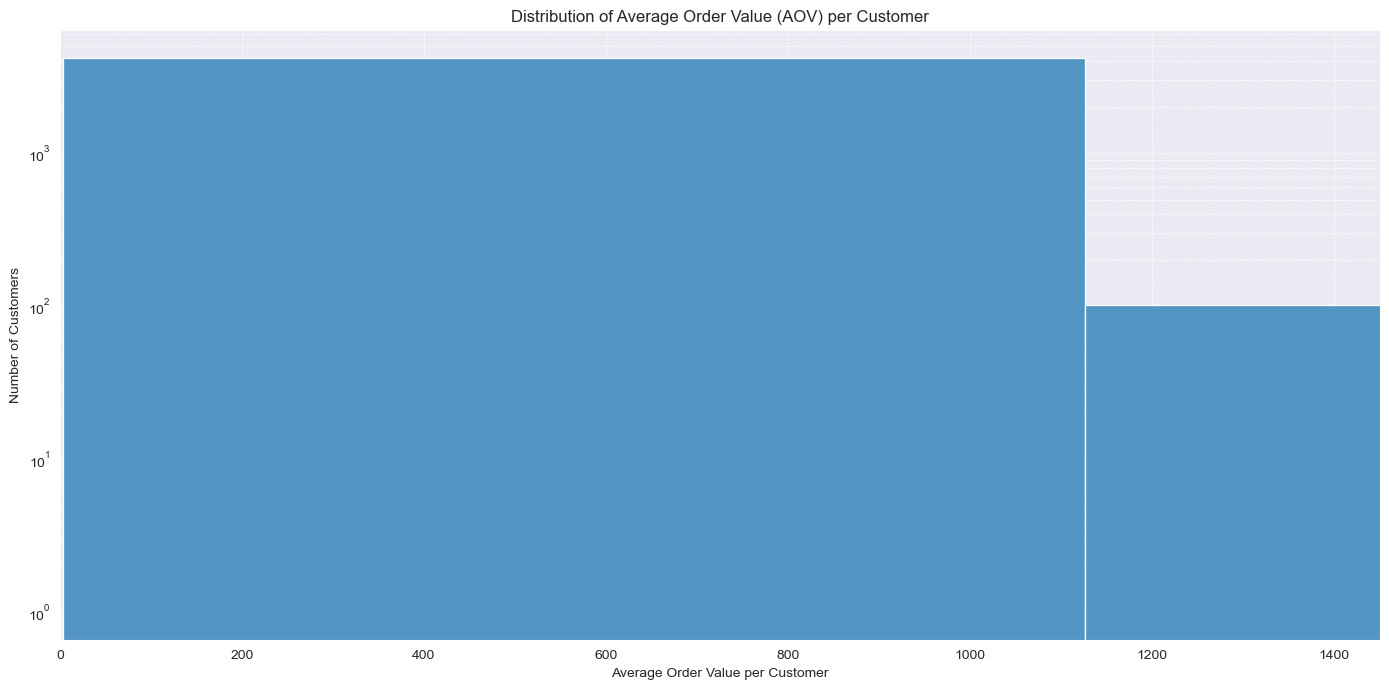


Top 10 customers by Average Order Value (AOV):
      CustomerID  TotalPrice  NumberOfOrders  AOV_per_Customer
3007       16446   168472.50               2      84236.250000
0          12346    77183.60               1      77183.600000
2502       15749    44534.30               3      14844.766667
2011       15098    39916.50               3      13305.500000
196        12590     9341.26               1       9341.260000
55         12415   124564.53              20       6228.226500
10         12357     6207.67               1       6207.670000
278        12688     4873.81               1       4873.810000
329        12752     4366.78               1       4366.780000
4198       18102   259657.30              60       4327.621667


In [22]:
# Ensure pandas, matplotlib.pyplot and seaborn are available
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # For potential bin calculations

# --- 1. Calculate Overall Average Order Value ---
# First, get the total revenue per invoice
invoice_totals = df_customers.groupby('InvoiceNo')['TotalPrice'].sum()
overall_aov = invoice_totals.mean()
print(f"Overall Average Order Value (AOV) for identified customers: {overall_aov:,.2f}")

# --- 2. Calculate Average Order Value per Customer ---
# We need total spending per customer and number of orders per customer.
# We already calculated these in previous steps:
# customer_spending (from Step 17: CustomerID, TotalPrice)
# customer_orders (from Step 18: CustomerID, NumberOfOrders)

# Merge these two DataFrames
customer_aov_data = pd.merge(customer_spending, customer_orders, on='CustomerID')

# Calculate AOV for each customer
customer_aov_data['AOV_per_Customer'] = customer_aov_data['TotalPrice'] / customer_aov_data['NumberOfOrders']

# --- 3. Descriptive Statistics for AOV per Customer ---
print("\nDescriptive statistics for Average Order Value (AOV) per Customer:")
print(customer_aov_data['AOV_per_Customer'].describe())

# --- 4. Visualize the Distribution of AOV per Customer ---
plt.figure(figsize=(14, 7))

# Determine a reasonable upper limit for x-axis for visualization
# (e.g., 98th percentile to exclude extreme outliers that stretch the plot)
aov_xlim_upper = customer_aov_data['AOV_per_Customer'].quantile(0.98)
if aov_xlim_upper <= 50: # Ensure xlim_upper is reasonable if 98th percentile is very low
    aov_xlim_upper = min(200, customer_aov_data['AOV_per_Customer'].max())
elif aov_xlim_upper > 2000: # Cap it if 98th percentile is extremely high
    aov_xlim_upper = 2000


# You might need to experiment with the number of bins
if aov_xlim_upper <= 100: # If the 98th percentile is low, use more granular bins
    bins = int(aov_xlim_upper / 2) if int(aov_xlim_upper / 2) > 10 else 20 # ensure at least 10 bins
else: # Otherwise, use a reasonable number of bins
    bins = 75


sns.histplot(data=customer_aov_data, x='AOV_per_Customer', bins=bins, kde=False)
plt.title('Distribution of Average Order Value (AOV) per Customer')
plt.xlabel('Average Order Value per Customer')
plt.ylabel('Number of Customers')
plt.yscale('log')  # Log scale is often crucial for skewed financial data
plt.xlim(0, aov_xlim_upper) # Zoom in on the majority
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Show top N customers by AOV
N = 10
top_aov_customers = customer_aov_data.sort_values(by='AOV_per_Customer', ascending=False).head(N)
print(f"\nTop {N} customers by Average Order Value (AOV):")
print(top_aov_customers)

### Step 21: Analyze Distribution of Total Spending per Customer

Descriptive statistics for Total Spending per Customer:
count      4335.000000
mean       2022.587694
std        8923.226623
min           3.750000
25%         305.765000
50%         668.110000
75%        1631.475000
max      279138.020000
Name: TotalPrice, dtype: float64


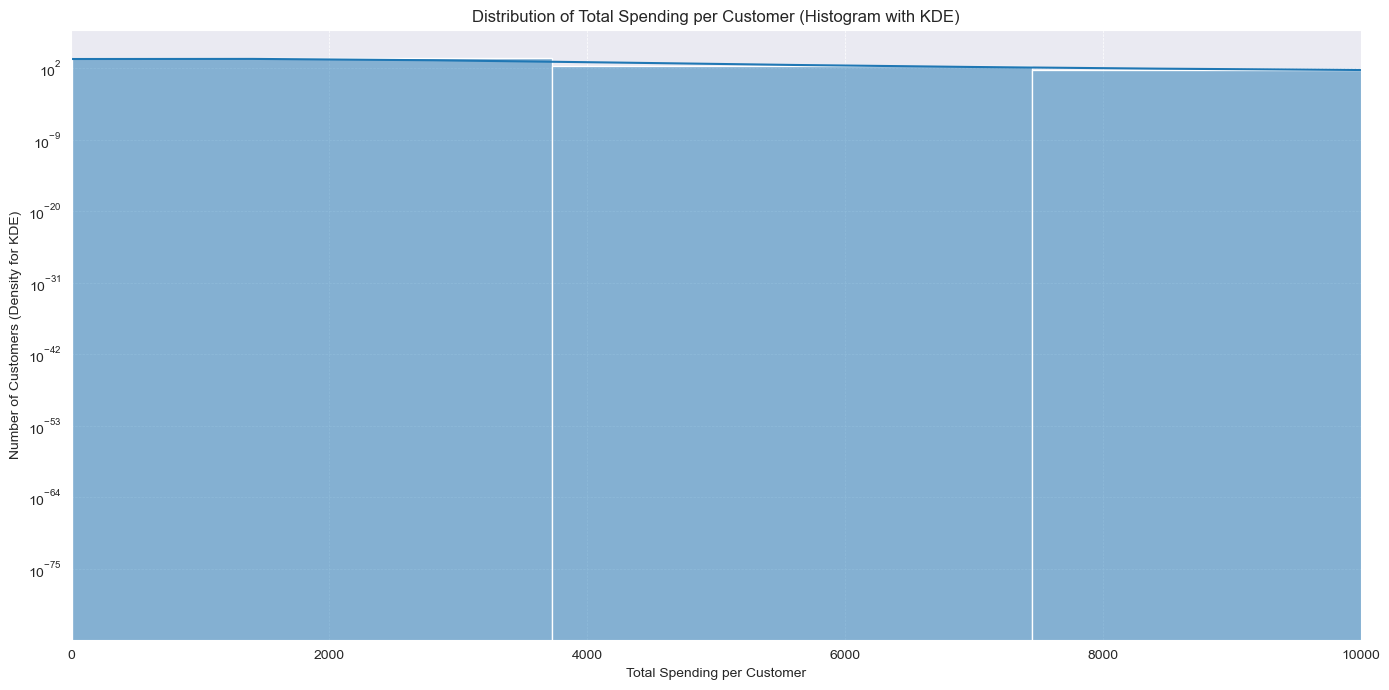

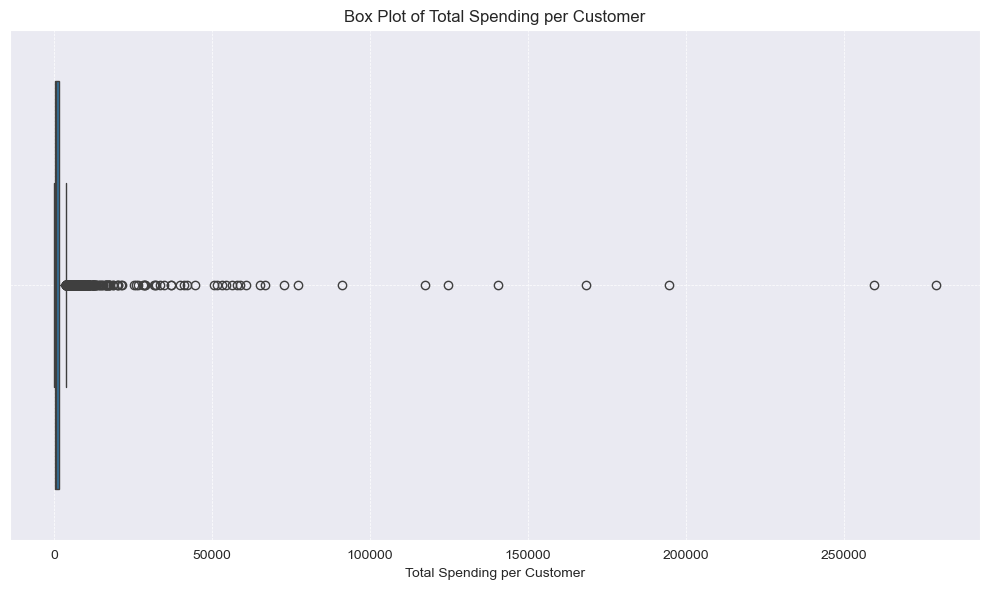

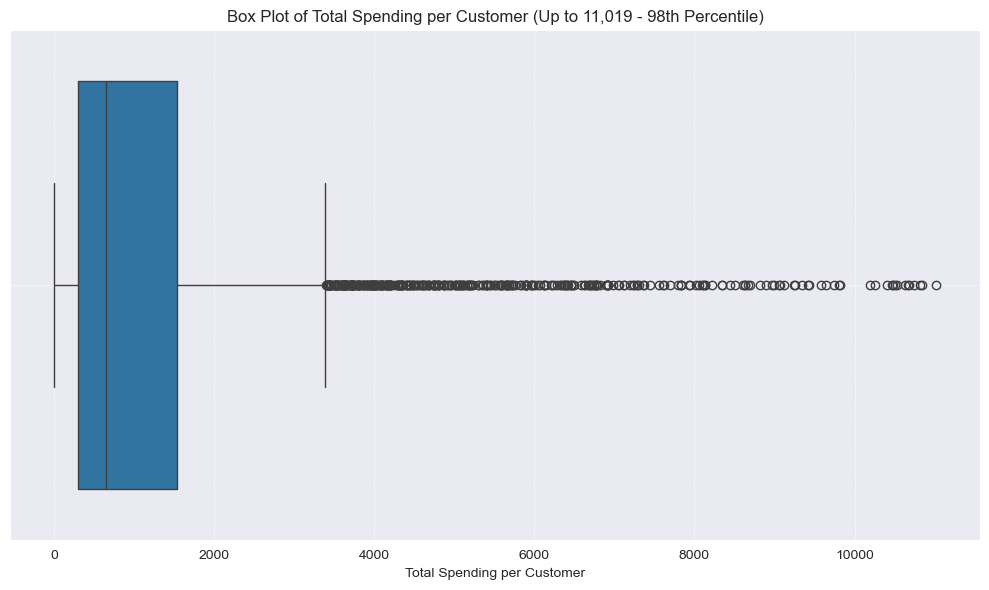

In [23]:
# Ensure pandas, matplotlib.pyplot and seaborn are available
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # For potential bin calculations

# We assume 'customer_spending' DataFrame is already available from Step 17:
# customer_spending = df_customers.groupby('CustomerID')['TotalPrice'].sum().reset_index()

# --- 1. Descriptive Statistics for Total Spending per Customer ---
print("Descriptive statistics for Total Spending per Customer:")
print(customer_spending['TotalPrice'].describe())

# --- 2. Visualize the Distribution of Total Spending per Customer ---

# Plot 1: Histogram with KDE for Total Spending
plt.figure(figsize=(14, 7))

# Determine a reasonable upper limit for x-axis for visualization
spending_xlim_upper = customer_spending['TotalPrice'].quantile(0.98)
# Cap the xlim for better visualization
if spending_xlim_upper > 10000: # Example cap, adjust as needed for spending
    spending_xlim_upper_plot = 10000
elif spending_xlim_upper <= 200:
    spending_xlim_upper_plot = min(1000, customer_spending['TotalPrice'].max())
else:
    spending_xlim_upper_plot = spending_xlim_upper

# Adaptive bins
if spending_xlim_upper_plot <= 500:
    bins = int(spending_xlim_upper_plot / 10) if int(spending_xlim_upper_plot / 10) > 10 else 20
else:
    bins = 75

sns.histplot(data=customer_spending, x='TotalPrice', bins=bins, kde=True)
plt.title('Distribution of Total Spending per Customer (Histogram with KDE)')
plt.xlabel('Total Spending per Customer')
plt.ylabel('Number of Customers (Density for KDE)')
plt.yscale('log')  # Log scale is crucial for skewed financial data
plt.xlim(0, spending_xlim_upper_plot) # Zoom in on the majority
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot 2: Box Plot for Total Spending
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_spending['TotalPrice'])
plt.title('Box Plot of Total Spending per Customer')
plt.xlabel('Total Spending per Customer')
# plt.xscale('log') # Optional: Use if outliers make the box hard to see
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Box plot zoomed into a reasonable percentile range
plt.figure(figsize=(10, 6))
# Using the same spending_xlim_upper (98th percentile before further capping for histogram)
sns.boxplot(x=customer_spending[customer_spending['TotalPrice'] <= spending_xlim_upper]['TotalPrice'])
plt.title(f'Box Plot of Total Spending per Customer (Up to {spending_xlim_upper:,.0f} - 98th Percentile)')
plt.xlabel('Total Spending per Customer')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()